In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
#hide
from fastai.data.all import *
from fastai.vision.augment import *
from fastpapers import *
from fastpapers.core import *
from fastpapers.carion2020end import *
from fastpapers.johnson2016perceptual import *
from fastai.data.all import *

In [ ]:
torch.cuda.set_device(3)

# Welcome to fastpapers

> Play LEGO with papers.

`fastpapers` is a python library where I use [fastai](https://docs.fast.ai/) to reproduce papers on [Jupyter Notebooks](https://jupyter.org/). I use [nbdev](https://nbdev.fast.ai/) to turn these notebooks into modules.

## Install

`pip install fastpapers`

## How to use

### Train DETR in 3 lines of code

Download the data

In [ ]:
path = download_coco(force_download=False)

Create the DataLoaders, the Learner, and fit.

In [ ]:
dls = CocoDataLoaders.from_sources(path, vocab=coco_vocab, num_workers=0)
learnd = detr_learner(dls)
learnd.fit(1, lr=[1e-5, 1e-5, 1e-5])

Using cache found in /home/andres/.cache/torch/hub/facebookresearch_detr_master


epoch,train_loss,valid_loss,AP,AP50,AP75,AP_small,AP_medium,AP_large,AR1,AR10,AR100,AR_small,AR_medium,AR_large,time
0,5.912706,7.469872,0.486210,0.585427,0.515968,0.318466,0.470359,0.571754,0.362405,0.557437,0.572482,0.391057,0.554963,0.641092,2:08:52


Show the results

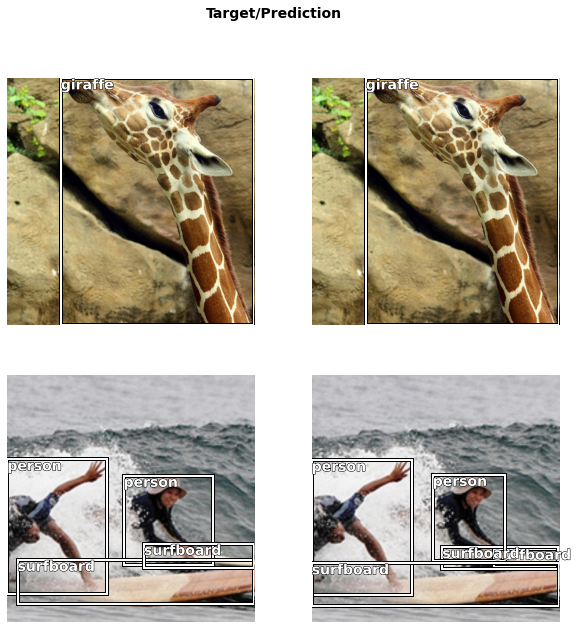

In [ ]:
with learnd.removed_cbs(learnd.coco_eval): learnd.show_results(max_n=8, figsize=(10,10))

### Superresolution in 4 lines of code

Download the data

In [ ]:
path = untar_data(URLs.IMAGENETTE)

Create the DataLoaders, the Learner adn fit.

In [ ]:
#hide_output
db = DataBlock(blocks=(ResImageBlock(72), ResImageBlock(288)),
               get_items=get_image_files,
               batch_tfms=Normalize.from_stats([0.5]*3, [0.5]*3))
dls = db.dataloaders(path, bs=4, num_workers=4)
learn = superres_learner(dls)
learn.fit(16, lr=1e-3, wd=0)

epoch,train_loss,valid_loss,time
0,32.603024,32.220062,04:17
1,32.292164,29.228277,04:18
2,30.810980,28.662733,04:17
3,28.449192,28.016418,06:46
4,26.182722,27.379101,07:43
5,25.878672,26.987818,07:46
6,29.230835,26.808540,06:24
7,25.310318,26.255995,07:23
8,27.575378,26.238050,08:07
9,28.782246,26.074461,05:54


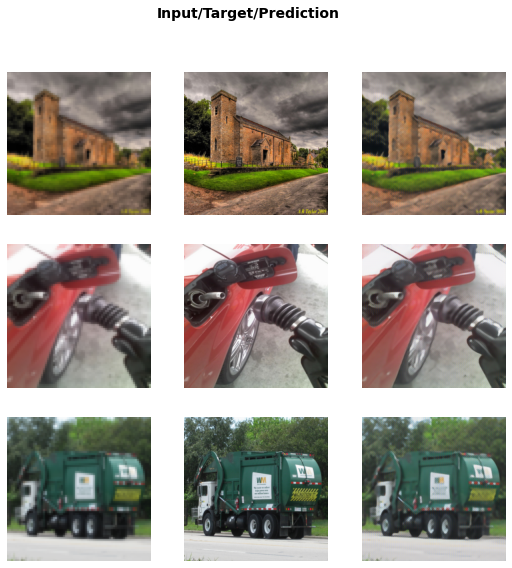

In [ ]:
learn.show_results()

### Library structure

The name of each module is the [bibtexkey](https://en.wikipedia.org/wiki/BibTeX#Field_types) of the corresponing paper.
For example, if you want to use the FID metric from [Heusel, Martin, et al. 2017](http://papers.nips.cc/paper/7240-gans-trained-by-a-two-t), you can import it like so:

In [ ]:
from fastpapers.heusel2017gans import FIDMetric

If you want to train a pix2pix model from Isola, [Phillip, et al](https://openaccess.thecvf.com/content_cvpr_2017/papers/Isola_Image-To-Image_Translation_With_CVPR_2017_paper.pdf) you can import a pix2pix_learner

In [ ]:
from fastpapers.isola2017image import pix2pix_learner

The `core` module contains functions and classes that are useful for several papers.
For example, you have a `ImageNTuple` to work with an arbitrary amount of images as input.

In [ ]:
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

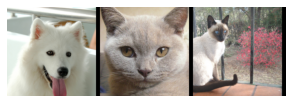

In [ ]:
it = ImageNTuple.create((files[0], files[1], files[2]))
it = Resize(224)(it)
it = ToTensor()(it)
it.show();

Or useful functions for debuging like `explode_shapes` or `explode_ranges`

In [ ]:
explode_shapes(it)

[(3, 224, 224), (3, 224, 224), (3, 224, 224)]